## TEWA 1- tutorial
## Eye movement analysis   1.


1. visualizing fixations.
2. heatmap calculation and visualization
3. scanpath visualization and descripitive statistics


Jozsef Arato

June-2022

Download the 2 images and the fixation datafile from the moodle


Data and images from:

_Wilming, N., Onat, S., Ossandón, J. P., Açık, A., Kietzmann, T. C., Kaspar, K., ... & König, P. (2017). An extensive dataset of eye movements during viewing of complex images. Scientific data, 4(1), 1-11._



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats, special, ndimage
from google.colab import files

upload the image files

In [ ]:
uploaded = files.upload()

Saving 9.png to 9.png
Saving 29.png to 29.png
Saving FixDatUrban.csv to FixDatUrban.csv


upload fixation data

In [ ]:
uploaded = files.upload()

Saving FixDatUrban.csv to FixDatUrban.csv


In [ ]:
fix_dat_urban = pd.read_csv("fix_dat_urban.csv")  # load data
stim9 = plt.imread("9.png")
stim29 = plt.imread("29.png")  # comment out the one that you are not using,

In [ ]:
print(np.shape(fix_dat_urban))
print(np.shape(stim9))

(29324, 17)
(960, 1280, 3)


"observe" the fixation data table...   

the variables that we will need:


*   mean_x and mean_y: location of fixations (pixel)

*   SUBJECTINDEX:   different participants

*   filenumber: stimuli





In [ ]:
fix_dat_urban

,Unnamed: 0,SUBJECTINDEX,age,answer,catch,category,dataset_nr,end,filenumber,fix,on_image,patchpos,start,trial,valid,mean_x,mean_y
0,105,1.0,2.0,1.0,0.0,8.0,0.0,656.0,38.0,1.0,1.0,633.0,490.0,7.0,1.0,397.92910,666.52770
1,106,1.0,2.0,1.0,0.0,8.0,0.0,908.0,38.0,2.0,1.0,1008.0,722.0,7.0,1.0,887.92660,652.97120
2,107,1.0,2.0,1.0,0.0,8.0,0.0,1166.0,38.0,3.0,1.0,633.0,946.0,7.0,1.0,1028.11320,561.21210
3,108,1.0,2.0,1.0,0.0,8.0,0.0,1436.0,38.0,4.0,1.0,1008.0,1224.0,7.0,1.0,733.53345,746.76150
4,109,1.0,2.0,1.0,0.0,8.0,0.0,1722.0,38.0,5.0,1.0,633.0,1492.0,7.0,1.0,371.01990,589.24677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29319,105725,58.0,1.0,0.0,0.0,8.0,0.0,4283.0,63.0,19.0,1.0,256.0,4065.0,124.0,1.0,690.36060,784.64430
29320,105726,58.0,1.0,0.0,0.0,8.0,0.0,4465.0,63.0,20.0,1.0,558.0,4313.0,124.0,1.0,800.40640,734.00770
29321,105727,58.0,1.0,0.0,0.0,8.0,0.0,4691.0,63.0,21.0,1.0,256.0,4513.0,124.0,1.0,1101.67090,493.60037
29322,105728,58.0,1.0,0.0,0.0,8.0,0.0,4881.0,63.0,22.0,1.0,558.0,4717.0,124.0,1.0,1153.76810,456.48746


## age variable

school children- students- elderly

In [ ]:
np.unique(fix_dat_urban["age"])

array([0., 1., 2.])

## visualize images

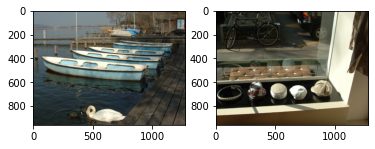

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(stim9)
plt.subplot(1, 2, 2)
plt.imshow(stim29)

In [ ]:
np.unique(fix_dat_urban["filenumber"])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [ ]:
len(np.unique(fix_dat_urban["filenumber"]))

64

select fixation data corresponding to your image using the image number - that is the filenumber column

In [ ]:
data9 = fix_dat_urban[fix_dat_urban["filenumber"] == 9]
data29 = fix_dat_urban[fix_dat_urban["filenumber"] == 29]

Make 2 numpy arrays, containing the mean_x and mean_y
values of the fixations (for one of the images)

In [ ]:
fix_x = np.array(data9["mean_x"])
fix_y = np.array(data9["mean_y"])
print(len(fix_x), len(fix_y))

480 480


## visualize


make a scatter plot of the fixations locations

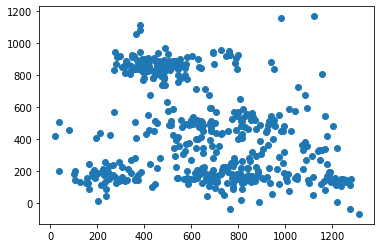

In [ ]:
plt.scatter(fix_x, fix_y)

use a imshow and a scatter plot to show the image and the fixations together

change the color and transparency (alpha) for a nicer visualization of the fixations



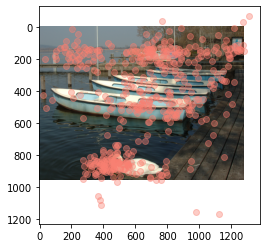

In [ ]:
# plt.scatter(FixX,FixY)
plt.figure()
plt.imshow(stim9)
# plt.scatter(FixX,FixY)
plt.scatter(data9["mean_x"], data9["mean_y"], color="salmon", alpha=0.4)

## saliency map   - heatmap
to calcualte a saliency map, we need a matrix, same size as the image to store the number of fixations for each pixel

### saliency map raw

In [ ]:
dims = np.shape(stim9)
print(dims)

n_fix = len(fix_x)

(960, 1280, 3)


In [ ]:
fix_x = np.intp(np.round(fix_x))
fix_y = np.intp(np.round(fix_y))

the next step is to "mark" each fixation on the above created matrix

you can think about it, as adding 1 to each pixel  for each fixation that falls there..



In [ ]:
sal_map_raw = np.zeros((dims[0], dims[1]))

print(np.shape(sal_map_raw))
outside = 0
for i in range(n_fix):
    try:
        sal_map_raw[fix_y[i], fix_x[i]] += 1  # y,x '
    except:
        outside += 1
print(outside)
np.sum(sal_map_raw)

(960, 1280)
7


473.0

In [ ]:
sal_map_raw = np.zeros((dims[0], dims[1]))
sal_map_raw[fix_y, fix_x] = 1

IndexError: ignored

In [ ]:
sal_map_raw = np.zeros((dims[0], dims[1]))
for i in range(n_fix):
    if fix_x[i] >= 0 and fix_x[i] < dims[1] and fix_y[i] >= 0 and fix_y[i] < dims[0]:
        sal_map_raw[fix_y[i], fix_x[i]] += 1  # YOUR CODE    # y,x '
    else:
        print(fix_y[i], fix_x[i])
print(dims)

-39 765
1159 981
1169 1122
1081 381
1058 364
1113 382
971 487
-34 1273
-68 1313
(960, 1280, 3)


In [ ]:
print(n_fix)
np.sum(sal_map_raw)

480


471.0

visualize the result of this calculation

In [ ]:
np.unique(sal_map_raw)  # .flatten())

array([0., 1.])

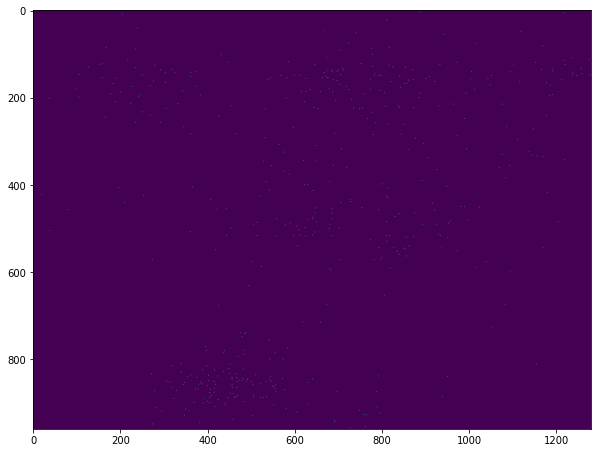

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(sal_map_raw)

(array([1.228329e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 4.710000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

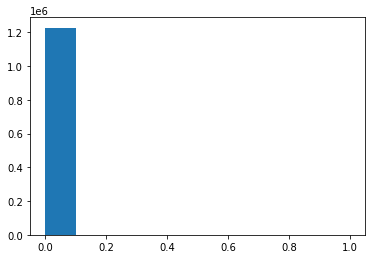

In [ ]:
plt.hist(sal_map_raw.flatten())
# plt.hist(SalMap.flatten())

we can use the function from scipy, to smooth the above calculation to creat a saliency map with:

ndimage.filters.gaussian_filter()

visualize the result, on top of the image



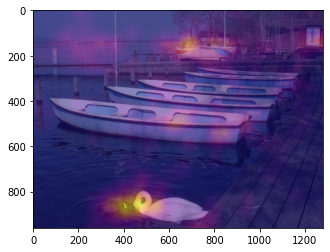

In [ ]:
sal_map = ndimage.filters.gaussian_filter(sal_mapRaw, 25)
plt.imshow(stim9)
plt.imshow(sal_map, alpha=0.5, cmap="plasma")

try different values for the standard deviation and visualize the result

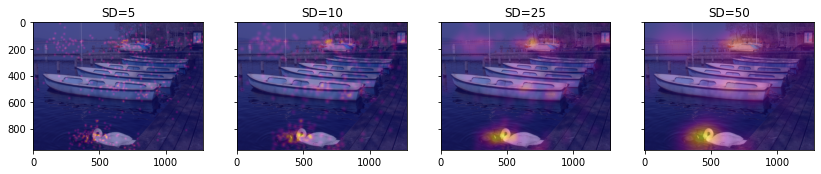

In [ ]:
s_ds = [5, 10, 25, 50]
# plt.figure(figsize=(8,6))
fig, ax = plt.subplots(ncols=4, figsize=(14, 6), sharey=True)
for cs, sd in enumerate(s_ds):
    sal_map = ndimage.filters.gaussian_filter(sal_mapRaw, sd)
    ax[cs].imshow(stim9)
    ax[cs].imshow(sal_map, alpha=0.5, cmap="plasma")
    ax[cs].set_title("SD=" + str(sd))

## scanpath

visualize the overall scanpath on the image


with a line plot-- this is suprisingly easy, since the fixations are ordered by default

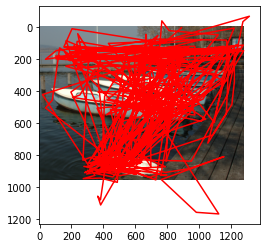

In [ ]:
plt.imshow(stim9)
plt.plot(data9["mean_x"], data9["mean_y"], color="r")

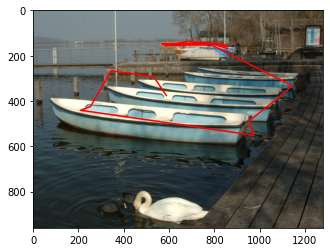

In [ ]:
plt.imshow(stim9)
plt.plot(
    data9["mean_x"][data9["SUBJECTINDEX"] == 1],
    data9["mean_y"][data9["SUBJECTINDEX"] == 1],
    color="r",
)

what could be the caveat of the above?



visualize scanpath for 2 participants on the same figure

to select participants use = 'SUBJECTINDEX'

In [ ]:
subjects = np.unique(data9["SUBJECTINDEX"])
print(subjects)

[ 1.  3.  6.  7. 10. 11. 13. 16. 18. 20. 23. 24. 27. 28. 30. 33. 35. 36.
 38. 41. 42. 45. 46. 48. 51. 53. 55. 56. 58.]


visualize scanpath of all participant, but with different color

(960.0, 0.0)

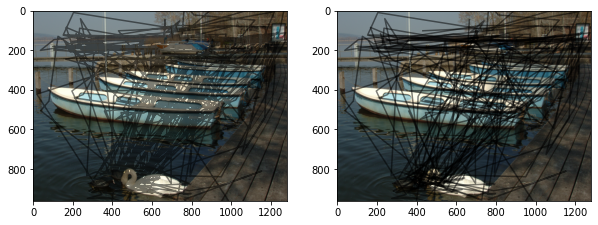

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(stim9)
plt.plot(fix_x, fix_y, color="k", alpha=0.5)
plt.xlim([0, dims[1]])
plt.ylim([dims[0], 0])
plt.subplot(1, 2, 2)
plt.imshow(stim9)
for cs, s in enumerate(subjects):
    idx = data9["SUBJECTINDEX"] == s
    # print(s,np.sum(idx))
    plt.plot(fix_x[idx], fix_y[idx], color="k", alpha=0.5)
plt.xlim([0, dims[1]])
plt.ylim([dims[0], 0])

how could we include direction in the scanpath visuals?

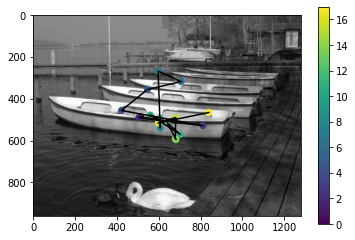

In [ ]:
subj = 11
idx = data9["SUBJECTINDEX"] == subj
plt.imshow(np.mean(stim9, 2), cmap="gray")
plt.plot(fix_x[idx], fix_y[idx], color="k")
plt.scatter(fix_x[idx], fix_y[idx], c=np.arange(np.sum(idx)))
plt.colorbar()

### scanpath length- saccade length

use the Pythegorian theorem, to calculate the scanpath length, for each participant, that is just the distance of subsequent fixations, added together

to calculate the average saccade length, simply divide the total scanpath by the number of saccades



In [ ]:
dist = np.sqrt(np.diff(fix_x[idx]) ** 2 + np.diff(fix_y[idx]) ** 2)
np.mean(dist)
np.sum(dist)
dist

array([ 97.49358953,   8.94427191, 308.47528264, 395.79034854,
       159.29846201, 165.42369842, 120.83045974, 272.18376146,
        46.04345773,  48.70318265, 171.42053553,  83.5463943 ,
        90.35485598,   5.        , 102.01960596,  87.93179175,
       247.11131095])

In [ ]:
fix_x[idx]

array([609, 513, 505, 811, 422, 546, 707, 597, 607, 605, 559, 703, 641,
       683, 679, 681, 597, 839])

In [ ]:
for cs, s in enumerate(subjects[0:n_subj_show]):
    print(cs, s)

0 1.0
1 3.0
2 6.0
3 7.0
4 10.0
5 11.0
6 13.0
7 16.0
8 18.0



make a figure with 3*3 subplots
showing the scanpath of 9 different observers.

add a title for each, that shows the  number of fixations and length of the scanpath vs average length of saccades (amplitude)



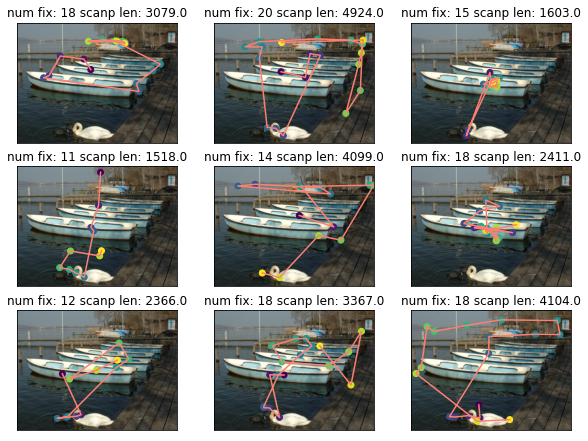

In [ ]:
plt.figure(figsize=(10, 7.5))
n_subj_show = 9
subjects = np.unique(data9["SUBJECTINDEX"])
for cs, s in enumerate(subjects[0:n_subj_show]):
    plt.subplot(3, 3, cs + 1)
    idx = data9["SUBJECTINDEX"] == s
    plt.imshow(stim9)
    plt.plot(fix_x[idx], fix_y[idx], color="salmon")
    dist = np.sqrt(np.diff(fix_x[idx]) ** 2 + np.diff(fix_y[idx]) ** 2)
    plt.scatter(fix_x[idx], fix_y[idx], c=np.arange(np.sum(idx)))
    plt.title(
        "num fix: " + str(np.sum(idx)) + " scanp len: " + str(np.round(np.sum(dist)))
    )
    plt.xticks([])
    plt.yticks([])

In [ ]:
subjects

NameError: ignored

### calculate eye-movement statistics for all stimuli and subjects
 tasks
 1. compare stimuli in terms of scanpath length
 2. compare groups of participants, are they different for some stimuli? are they different averaged across stimuli?

In [ ]:
groups = np.unique(fix_dat_urban["age"])
group_names = ["young", "student", "elderly"]
subjects = np.unique(fix_dat_urban["SUBJECTINDEX"])
stimuli = np.unique(fix_dat_urban["filenumber"])
print("subjects: ", subjects)
print("stimuli: ", stimuli)

Subjects:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58.]
Stimuli:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]


In [ ]:
(fix_dat_urban["filenumber"] == s) & (fix_dat_urban["SUBJECTINDEX"] == subj)

0        False
1        False
2        False
3        False
4        False
         ...  
29319    False
29320    False
29321    False
29322    False
29323    False
Length: 29324, dtype: bool

##